In [61]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import linear_kernel

### EDA para la funcion def Play TimeGenre

In [2]:
# Creo dataframe de mis archivos para proceder a ver que columnas necesito para esta funcion

df_games = pd.read_parquet('games.parquet')
df_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   publisher     21194 non-null  object        
 1   genres        21194 non-null  object        
 2   app_name      21194 non-null  object        
 3   title         21194 non-null  object        
 4   url           21194 non-null  object        
 5   release_date  21194 non-null  datetime64[ns]
 6   tags          21194 non-null  object        
 7   reviews_url   21194 non-null  object        
 8   specs         21194 non-null  object        
 9   price         21194 non-null  float64       
 10  early_access  21194 non-null  bool          
 11  id            21194 non-null  object        
 12  developer     21194 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(1), object(10)
memory usage: 2.0+ MB


In [3]:
df_reviews = pd.read_parquet('reviews.parquet')
df_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25771 entries, 0 to 25770
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   user_id             25771 non-null  object        
 1   user_url            25771 non-null  object        
 2   funny               25771 non-null  object        
 3   posted              25771 non-null  object        
 4   last_edited         25771 non-null  object        
 5   item_id             25771 non-null  int64         
 6   helpful             25771 non-null  object        
 7   recommend           25771 non-null  bool          
 8   review              25771 non-null  object        
 9   Month               25771 non-null  int32         
 10  Day                 25771 non-null  int32         
 11  Year                25771 non-null  int32         
 12  posted_date         25762 non-null  datetime64[ns]
 13  sentiment_analysis  25771 non-null  int64     

In [4]:
df_items = pd.read_parquet('items.parquet')
df_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   user_id           88176 non-null  object 
 1   items_count       88176 non-null  float64
 2   steam_id          88176 non-null  object 
 3   user_url          88176 non-null  object 
 4   item_id           88176 non-null  int64  
 5   item_name         88176 non-null  object 
 6   playtime_forever  88176 non-null  float64
 7   playtime_2weeks   88176 non-null  float64
dtypes: float64(3), int64(1), object(4)
memory usage: 5.4+ MB


In [5]:
# Selecciono los campos requeridos para la función PlayTimeGenre
# Concateno los DataFrames seleccionados

df_games_subset = df_games[['genres', 'release_date', 'id']]
df_reviews_subset = df_reviews[['item_id', 'posted_date']]
df_items_subset = df_items[['playtime_forever']]

df_funcion_play = df_games_subset.join([df_reviews_subset, df_items_subset])

df_funcion_play.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genres            21194 non-null  object        
 1   release_date      21194 non-null  datetime64[ns]
 2   id                21194 non-null  object        
 3   item_id           21194 non-null  float64       
 4   posted_date       21187 non-null  datetime64[ns]
 5   playtime_forever  21194 non-null  float64       
dtypes: datetime64[ns](2), float64(2), object(2)
memory usage: 993.6+ KB


In [6]:
df_funcion_play.head()

,genres,release_date,id,item_id,posted_date,playtime_forever
0,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,761140,43110.0,2011-01-01,6.0
1,"[Action, Adventure, Casual]",2017-12-07,767400,239030.0,2013-01-01,0.0
2,"[Action, Adventure, Simulation]",2018-01-04,772540,224500.0,2014-01-01,7.0
3,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,774277,108710.0,2012-01-01,0.0
4,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,774278,204300.0,2013-01-01,0.0


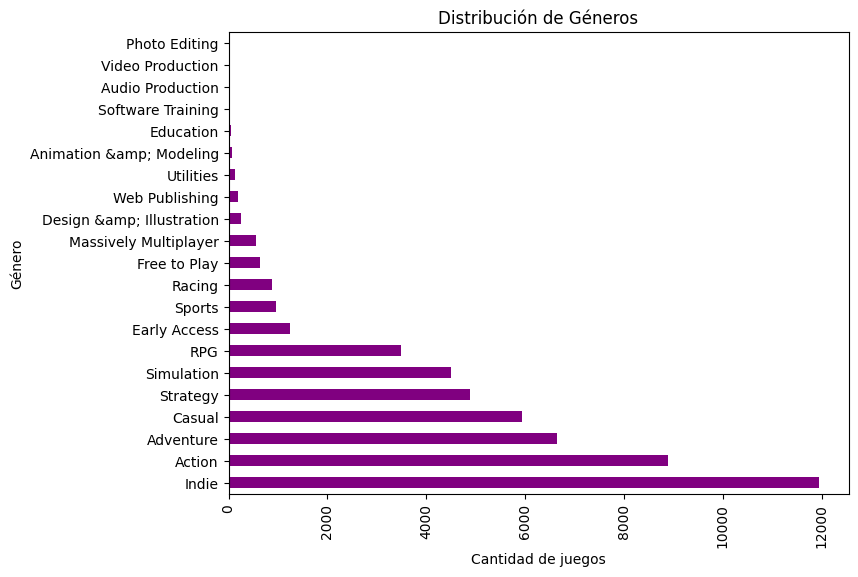

In [7]:


# Explora la columna 'genres' para que cada género sea una fila independiente
# Cuenta la cantidad de juegos en cada género

df_exploded = df_funcion_play.explode('genres')

genero_counts = df_exploded['genres'].value_counts()

plt.figure(figsize=(8, 6))

genero_counts.plot(kind='barh', color='purple') 

plt.xlabel('Cantidad de juegos')
plt.ylabel('Género')
plt.title('Distribución de Géneros')

plt.xticks(rotation=90)

plt.show()


In [8]:
genero_item_counts = df_exploded['genres'].value_counts()

print(genero_item_counts)


genres
Indie                        11944
Action                        8883
Adventure                     6652
Casual                        5929
Strategy                      4882
Simulation                    4503
RPG                           3496
Early Access                  1238
Sports                         970
Racing                         887
Free to Play                   637
Massively Multiplayer          563
Design &amp; Illustration      251
Web Publishing                 191
Utilities                      129
Animation &amp; Modeling        79
Education                       50
Software Training               33
Audio Production                29
Video Production                18
Photo Editing                   10
Name: count, dtype: int64


In [9]:
#  lista de años únicos en la columna 'release_date' ordenados
# Se obtiene el número total de años únicos

lista_anios = df_funcion_play['release_date'].dt.year.drop_duplicates().sort_values().tolist()

total_anios = len(lista_anios)

print("Lista de años ordenados:")
print(lista_anios)

print(f"Número total de años: {total_anios}")


Lista de años ordenados:
[1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2021]
Número total de años: 38


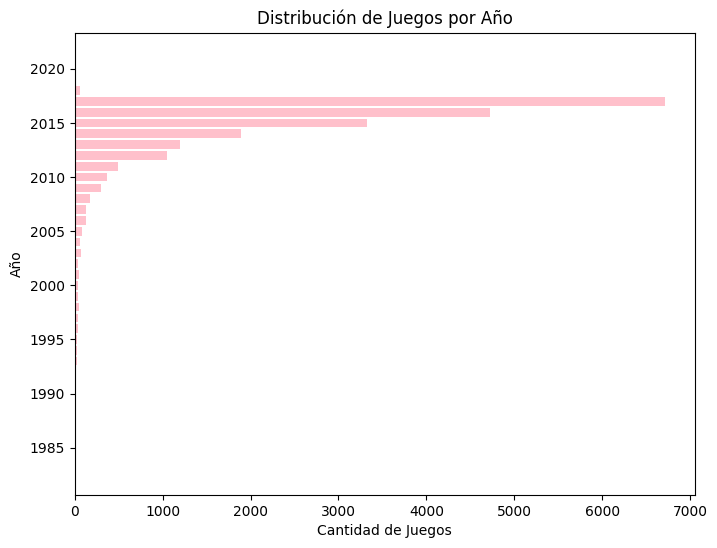

In [10]:


# Obtén una lista de años únicos en la columna 'release_date' ordenados
lista_anios = df_funcion_play['release_date'].dt.year.drop_duplicates().sort_values()

# Cuenta la cantidad de juegos por año
juegos_por_anio = df_funcion_play['release_date'].dt.year.value_counts().loc[lista_anios]

plt.figure(figsize=(8, 6))

plt.barh(lista_anios, juegos_por_anio, color='pink')
plt.xlabel('Cantidad de Juegos')
plt.ylabel('Año')
plt.title('Distribución de Juegos por Año')

plt.show()


Lista de Años con la Cantidad de Juegos:
    Año de Lanzamiento  Número de Lanzamientos
33                1983                       1
32                1984                       2
37                1985                       1
34                1986                       1
31                1987                       4
30                1988                       5
29                1989                       7
28                1990                       8
27                1991                      10
26                1992                      13
25                1993                      24
23                1994                      30
24                1995                      30
22                1996                      33
20                1997                      38
17                1998                      48
18                1999                      39
21                2000                      34
16                2001                      53
19                2

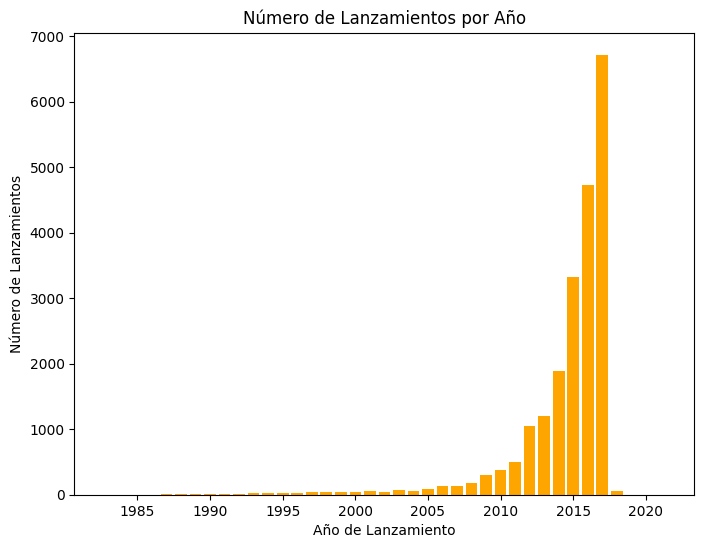

In [11]:
import matplotlib.pyplot as plt

# Obtén el número de lanzamientos por año y crea un DataFrame
lanzamientos_por_año = df_funcion_play['release_date'].dt.year.value_counts().reset_index()

# Renombra las columnas del DataFrame resultante
lanzamientos_por_año.columns = ['Año de Lanzamiento', 'Número de Lanzamientos']

# Ordena los datos por año
lanzamientos_por_año = lanzamientos_por_año.sort_values(by='Año de Lanzamiento')

# Imprime la lista de años con la cantidad de juegos
print("Lista de Años con la Cantidad de Juegos:")
print(lanzamientos_por_año)

# Gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(lanzamientos_por_año['Año de Lanzamiento'], lanzamientos_por_año['Número de Lanzamientos'], color='orange')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Lanzamientos')
plt.title('Número de Lanzamientos por Año')

plt.show()


Lista de Años con la Cantidad de Minutos de Juego:
    Año de Lanzamiento  Minutos de juego
0                 1983            1381.0
1                 1984               0.0
2                 1985               0.0
3                 1986               0.0
4                 1987             869.0
5                 1988            6081.0
6                 1989           52400.0
7                 1990            1328.0
8                 1991            1156.0
9                 1992           17026.0
10                1993           42846.0
11                1994           49265.0
12                1995           39970.0
13                1996           15416.0
14                1997           22753.0
15                1998           23476.0
16                1999           25255.0
17                2000           35770.0
18                2001           17233.0
19                2002           11262.0
20                2003          115082.0
21                2004           42304.0
22    

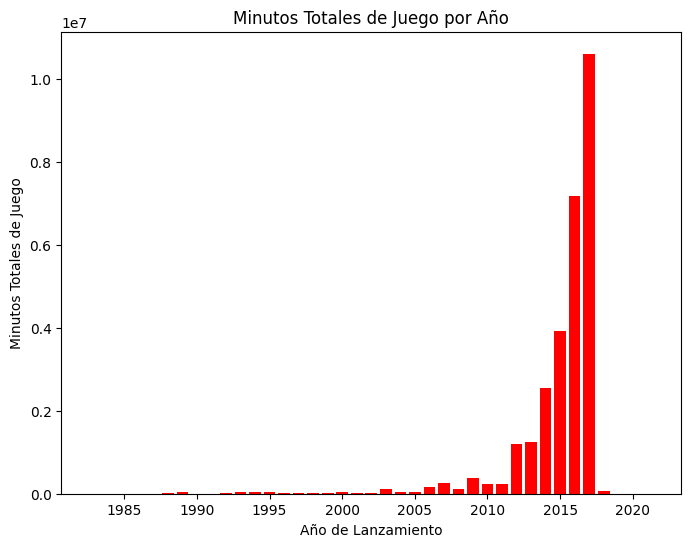

In [12]:

# Agrupa por año de lanzamiento y suma el tiempo de juego en minutos
minutos_por_año = df_funcion_play.groupby(df_funcion_play['release_date'].dt.year)['playtime_forever'].sum().reset_index()

# Renombra las columnas del DataFrame resultante
minutos_por_año.columns = ['Año de Lanzamiento', 'Minutos de juego']

# Imprime la lista de años con la cantidad de minutos totales de juego
print("Lista de Años con la Cantidad de Minutos de Juego:")
print(minutos_por_año)

# Gráfica de barras
plt.figure(figsize=(8, 6))
plt.bar(minutos_por_año['Año de Lanzamiento'], minutos_por_año['Minutos de juego'], color='red')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Minutos Totales de Juego')
plt.title('Minutos Totales de Juego por Año')

plt.show()


In [13]:
# Expando las listas de géneros en nuevas filas duplicando los demás valores
df_expandido = df_funcion_play.explode('genres')

# Agrego una columna con el año de lanzamiento
df_expandido['año'] = df_expandido['release_date'].dt.year

# Creo una tabla dinámica (tabla_minutos_genero) que muestra los minutos jugados por género y año de lanzamiento
tabla_minutos_genero = pd.pivot_table(df_expandido, values='playtime_forever', index='año', columns='genres', aggfunc='sum', fill_value=0)

tabla_minutos_genero

genres,Action,Adventure,Animation &amp; Modeling,Audio Production,Casual,Design &amp; Illustration,Early Access,Education,Free to Play,Indie,...,Photo Editing,RPG,Racing,Simulation,Software Training,Sports,Strategy,Utilities,Video Production,Web Publishing
año,,,,,,,,,,,,,,,,,,,,,
1983,1381.0,1381.0,0.0,0.0,1381.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1985,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1986,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1987,0.0,869.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,75.0,0.0,0.0,0.0,0.0,0.0,0.0
1988,4932.0,5985.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1053.0,...,0.0,1053.0,0.0,24.0,0.0,0.0,1125.0,0.0,0.0,0.0
1989,4935.0,26361.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,4578.0,0.0,26275.0,0.0,0.0,0.0,0.0,0.0,0.0
1990,132.0,1182.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,146.0,0.0,0.0,0.0,0.0,0.0,0.0
1991,302.0,884.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,...,0.0,150.0,0.0,149.0,0.0,0.0,729.0,0.0,0.0,0.0


In [14]:
def PlayTimeGenre(genero):
    df_expancion = df_funcion_play.explode('genres')

    # Filtro las filas que contienen el género especificado
    df_filas = df_expancion[df_expancion['genres'] == genero]

    if df_filas.empty:
        return {f"No se encontraron datos para el género {genero}": None}

    # Encuentro el año con más horas jugadas para el género
    max_year = df_filas.groupby('release_date')['playtime_forever'].sum().idxmax().year

    return {f"Año de lanzamiento con más horas jugadas para el género {genero}": max_year}

print(PlayTimeGenre("Casual"))

{'Año de lanzamiento con más horas jugadas para el género Casual': 2017}


In [15]:
# Creo un archivo .parquet para la funcion PlayTime Genre

df_play = df_funcion_play[['genres', 'release_date', 'playtime_forever']]

df_play.to_parquet('data_play.parquet', index=False)

df_play

,genres,release_date,playtime_forever
0,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,6.0
1,"[Action, Adventure, Casual]",2017-12-07,0.0
2,"[Action, Adventure, Simulation]",2018-01-04,7.0
3,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,0.0
4,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,0.0
...,...,...,...
21189,"[Action, Adventure, Casual, Indie]",2018-01-04,269.0
21190,"[Casual, Indie, Simulation, Strategy]",2018-01-04,0.0
21191,"[Casual, Indie, Strategy]",2018-01-04,754.0
21192,"[Indie, Racing, Simulation]",2018-01-04,0.0


In [16]:
df_play.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genres            21194 non-null  object        
 1   release_date      21194 non-null  datetime64[ns]
 2   playtime_forever  21194 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 496.9+ KB


### EDA para la funcion def UserForGenre

In [17]:
# Selecciona los campos requeridos para la función PlayTimeGenre
# Realiza la fusión (merge) de los DataFrames seleccionados

df_games_subset = df_play[['genres', 'release_date']]
df_reviews_subset = df_reviews[['item_id']]
df_items_subset = df_items[['playtime_forever', 'user_id']]

df_funcion_genre = df_games_subset.merge(df_reviews_subset, left_index=True, right_index=True)
df_funcion_genre = df_funcion_genre.merge(df_items_subset, left_index=True, right_index=True)

df_funcion_genre.info()


<class 'pandas.core.frame.DataFrame'>
Index: 21194 entries, 0 to 21193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genres            21194 non-null  object        
 1   release_date      21194 non-null  datetime64[ns]
 2   item_id           21194 non-null  int64         
 3   playtime_forever  21194 non-null  float64       
 4   user_id           21194 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 993.5+ KB


In [18]:
df_funcion_genre.head()

,genres,release_date,item_id,playtime_forever,user_id
0,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,43110,6.0,76561197970982479
1,"[Action, Adventure, Casual]",2017-12-07,239030,0.0,js41637
2,"[Action, Adventure, Simulation]",2018-01-04,224500,7.0,evcentric
3,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,108710,0.0,Riot-Punch
4,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,204300,0.0,doctr


In [19]:
df_funcion_genre.dropna(inplace=True)
df_funcion_genre.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21194 entries, 0 to 21193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genres            21194 non-null  object        
 1   release_date      21194 non-null  datetime64[ns]
 2   item_id           21194 non-null  int64         
 3   playtime_forever  21194 non-null  float64       
 4   user_id           21194 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 993.5+ KB


In [20]:
# Reorganizo los indices despues de la eliminación de datos faltantes
df_funcion_genre.reset_index(drop=True, inplace=True)
print(df_funcion_genre.index)

RangeIndex(start=0, stop=21194, step=1)


In [21]:
df_funcion_genre.head()

,genres,release_date,item_id,playtime_forever,user_id
0,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,43110,6.0,76561197970982479
1,"[Action, Adventure, Casual]",2017-12-07,239030,0.0,js41637
2,"[Action, Adventure, Simulation]",2018-01-04,224500,7.0,evcentric
3,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,108710,0.0,Riot-Punch
4,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,204300,0.0,doctr


In [22]:
df_funcion_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genres            21194 non-null  object        
 1   release_date      21194 non-null  datetime64[ns]
 2   item_id           21194 non-null  int64         
 3   playtime_forever  21194 non-null  float64       
 4   user_id           21194 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 828.0+ KB


In [23]:
# Se filtran las filas que contienen el género especificado
# Se Encuentra el usuario que jugó más minutos para el género
# Se agrupan los minutos jugados por año
def UserForGenre(df, genero):
    df_filtered = df[df['genres'].apply(lambda x: genero in x)]

    if df_filtered.empty:
        return "No se encontraron datos para el género especificado", []

    usuario_max_horas = df_filtered[df_filtered['playtime_forever'] == df_filtered['playtime_forever'].max()]['user_id'].values[0]

    acumulacion_horas_por_anio = df_filtered.groupby(df_filtered['release_date'].dt.year)['playtime_forever'].sum()

    return usuario_max_horas, [{"Año": año, "Horas": horas} for año, horas in acumulacion_horas_por_anio.items()]

genero_buscado = "Action"
usuario_max_horas, acumulacion_horas_por_anio = UserForGenre(df_funcion_genre, genero_buscado)

print(f"Usuario con más horas jugadas para el género {genero_buscado}: {usuario_max_horas}")
print("Acumulación de horas jugadas por año:")
for anio, horas in enumerate(acumulacion_horas_por_anio):
    print(f"Año {anio}: {horas} horas")






Usuario con más horas jugadas para el género Action: 76561198045479668
Acumulación de horas jugadas por año:
Año 0: {'Año': 1983, 'Horas': 1381.0} horas
Año 1: {'Año': 1984, 'Horas': 0.0} horas
Año 2: {'Año': 1988, 'Horas': 4932.0} horas
Año 3: {'Año': 1989, 'Horas': 4935.0} horas
Año 4: {'Año': 1990, 'Horas': 132.0} horas
Año 5: {'Año': 1991, 'Horas': 302.0} horas
Año 6: {'Año': 1992, 'Horas': 7284.0} horas
Año 7: {'Año': 1993, 'Horas': 39273.0} horas
Año 8: {'Año': 1994, 'Horas': 3471.0} horas
Año 9: {'Año': 1995, 'Horas': 33292.0} horas
Año 10: {'Año': 1996, 'Horas': 5567.0} horas
Año 11: {'Año': 1997, 'Horas': 5016.0} horas
Año 12: {'Año': 1998, 'Horas': 9503.0} horas
Año 13: {'Año': 1999, 'Horas': 20288.0} horas
Año 14: {'Año': 2000, 'Horas': 26230.0} horas
Año 15: {'Año': 2001, 'Horas': 5889.0} horas
Año 16: {'Año': 2002, 'Horas': 9230.0} horas
Año 17: {'Año': 2003, 'Horas': 93002.0} horas
Año 18: {'Año': 2004, 'Horas': 13971.0} horas
Año 19: {'Año': 2005, 'Horas': 5937.0} horas


In [24]:
# Creo un archivo .parquet para la funcion PlayTime Genre

df_genre = df_funcion_genre[['genres', 'release_date', 'playtime_forever', 'item_id','user_id']]

df_genre.to_parquet('data_genre.parquet', index=False)

df_genre.head()

,genres,release_date,playtime_forever,item_id,user_id
0,"[Action, Casual, Indie, Simulation, Strategy]",2018-01-04,6.0,43110,76561197970982479
1,"[Action, Adventure, Casual]",2017-12-07,0.0,239030,js41637
2,"[Action, Adventure, Simulation]",2018-01-04,7.0,224500,evcentric
3,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,0.0,108710,Riot-Punch
4,"[Free to Play, Indie, Simulation, Sports]",2018-01-04,0.0,204300,doctr


In [25]:
df_genre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   genres            21194 non-null  object        
 1   release_date      21194 non-null  datetime64[ns]
 2   playtime_forever  21194 non-null  float64       
 3   item_id           21194 non-null  int64         
 4   user_id           21194 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(1), object(2)
memory usage: 828.0+ KB


### EDA funcion UsersRecommend

In [26]:
# Uno las columnas de los diferentes dataframen para esta funcion 

funcion_recommend = pd.concat([
    df_games[['title']],
    df_reviews[['item_id', 'recommend', 'posted_date', 'sentiment_analysis']],
    df_items[['user_id']]
], axis=1)
funcion_recommend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               21194 non-null  object        
 1   item_id             25771 non-null  float64       
 2   recommend           25771 non-null  object        
 3   posted_date         25762 non-null  datetime64[ns]
 4   sentiment_analysis  25771 non-null  float64       
 5   user_id             88176 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 4.0+ MB


In [27]:
funcion_recommend.head()

,title,item_id,recommend,posted_date,sentiment_analysis,user_id
0,Lost Summoner Kitty,43110.0,True,2011-01-01,2.0,76561197970982479
1,弹炸人2222,239030.0,True,2013-01-01,0.0,js41637
2,Battle Royale Trainer,224500.0,True,2014-01-01,2.0,evcentric
3,SNOW - All Access Pro Pass,108710.0,True,2012-01-01,2.0,Riot-Punch
4,SNOW - All Access Legend Pass,204300.0,True,2013-01-01,2.0,doctr


In [28]:
# Se eliminan los datos faltantes

funcion_recommend.dropna(inplace=True)
funcion_recommend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21187 entries, 0 to 21193
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               21187 non-null  object        
 1   item_id             21187 non-null  float64       
 2   recommend           21187 non-null  object        
 3   posted_date         21187 non-null  datetime64[ns]
 4   sentiment_analysis  21187 non-null  float64       
 5   user_id             21187 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.1+ MB


In [29]:
funcion_recommend.head()

,title,item_id,recommend,posted_date,sentiment_analysis,user_id
0,Lost Summoner Kitty,43110.0,True,2011-01-01,2.0,76561197970982479
1,弹炸人2222,239030.0,True,2013-01-01,0.0,js41637
2,Battle Royale Trainer,224500.0,True,2014-01-01,2.0,evcentric
3,SNOW - All Access Pro Pass,108710.0,True,2012-01-01,2.0,Riot-Punch
4,SNOW - All Access Legend Pass,204300.0,True,2013-01-01,2.0,doctr


In [30]:
# Reorganizo los indices despues de la eliminación de datos faltantes
funcion_recommend.reset_index(drop=True, inplace=True)
print(funcion_recommend.index)

RangeIndex(start=0, stop=21187, step=1)


In [31]:
funcion_recommend.head()

,title,item_id,recommend,posted_date,sentiment_analysis,user_id
0,Lost Summoner Kitty,43110.0,True,2011-01-01,2.0,76561197970982479
1,弹炸人2222,239030.0,True,2013-01-01,0.0,js41637
2,Battle Royale Trainer,224500.0,True,2014-01-01,2.0,evcentric
3,SNOW - All Access Pro Pass,108710.0,True,2012-01-01,2.0,Riot-Punch
4,SNOW - All Access Legend Pass,204300.0,True,2013-01-01,2.0,doctr


In [32]:
funcion_recommend.tail()

,title,item_id,recommend,posted_date,sentiment_analysis,user_id
21182,Kebab it Up!,8930.0,True,2014-01-01,0.0,76561198060027840
21183,Colony On Mars,440.0,True,2015-01-01,2.0,7Shadows
21184,LOGistICAL: South Africa,468410.0,True,2014-06-13,2.0,76561198077307220
21185,Russian Roads,4000.0,False,2015-01-01,0.0,amr_
21186,EXIT 2 - Directions,730.0,True,2014-01-01,2.0,amstelebomdemais


In [33]:
# Cambio el tipo de dato de la columna "recommend" a booleano
funcion_recommend['recommend'] = funcion_recommend['recommend'].astype(bool)

In [34]:
funcion_recommend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21187 entries, 0 to 21186
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               21187 non-null  object        
 1   item_id             21187 non-null  float64       
 2   recommend           21187 non-null  bool          
 3   posted_date         21187 non-null  datetime64[ns]
 4   sentiment_analysis  21187 non-null  float64       
 5   user_id             21187 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(2)
memory usage: 848.4+ KB


In [35]:
funcion_recommend.head()

,title,item_id,recommend,posted_date,sentiment_analysis,user_id
0,Lost Summoner Kitty,43110.0,True,2011-01-01,2.0,76561197970982479
1,弹炸人2222,239030.0,True,2013-01-01,0.0,js41637
2,Battle Royale Trainer,224500.0,True,2014-01-01,2.0,evcentric
3,SNOW - All Access Pro Pass,108710.0,True,2012-01-01,2.0,Riot-Punch
4,SNOW - All Access Legend Pass,204300.0,True,2013-01-01,2.0,doctr


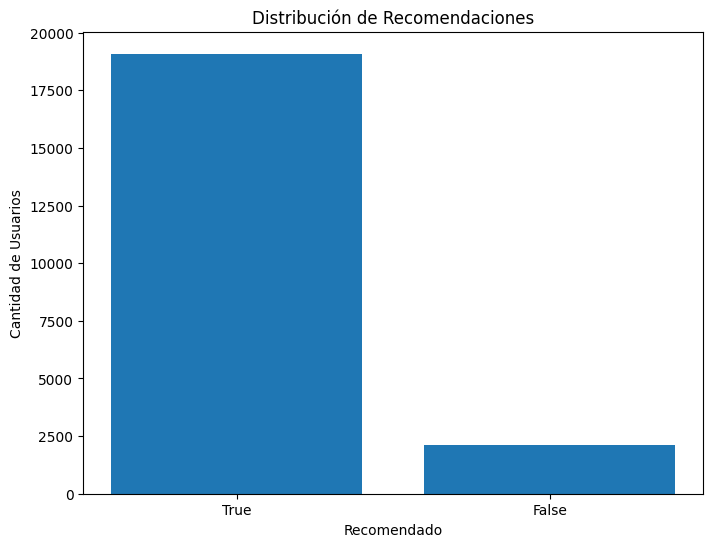

In [36]:

# Filtra los datos por recomendaciones True y False
# Cuenta la cantidad de recomendaciones True y Fals

recomendados = funcion_recommend[funcion_recommend['recommend'] == True]
no_recomendados = funcion_recommend[funcion_recommend['recommend'] == False]

conteo_recomendados = len(recomendados)
conteo_no_recomendados = len(no_recomendados)

categorias = ['True', 'False']
cantidad = [conteo_recomendados, conteo_no_recomendados]

plt.figure(figsize=(8, 6))
plt.bar(categorias, cantidad)
plt.title('Distribución de Recomendaciones')
plt.xlabel('Recomendado')
plt.ylabel('Cantidad de Usuarios')

plt.show()


  Sentimiento  Conteo
0       Bueno   12371
1     Neutral    4614
2        Malo    4202


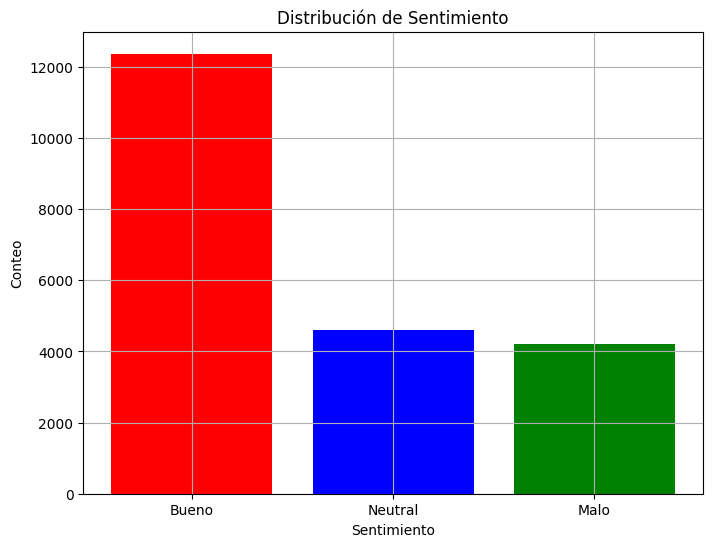

In [37]:


# Supongamos que 'tercera_funcion' es un DataFrame de pandas con la columna 'sentiment_analysis'

# Defino las categorías y sus etiquetas
categorias = {0: 'Malo', 1: 'Neutral', 2: 'Bueno'}

# Calculo el conteo de cada categoría en la columna sentiment_analysis
conteo_sentimiento = funcion_recommend['sentiment_analysis'].map(categorias).value_counts().reset_index()

# Renombro las columnas
conteo_sentimiento.columns = ['Sentimiento', 'Conteo']

# Muestro la tabla de conteo
print(conteo_sentimiento)

# Defino colores personalizados
colores = ['red', 'blue', 'green']

# Creo un gráfico de barras con colores personalizados
plt.figure(figsize=(8, 6))
plt.bar(conteo_sentimiento['Sentimiento'], conteo_sentimiento['Conteo'], color=colores)
plt.title('Distribución de Sentimiento')
plt.xlabel('Sentimiento')
plt.ylabel('Conteo')
plt.grid(True)

plt.show()


In [38]:
def UsersRecommend(año, n=3):
    # Filtro los juegos recomendados y con comentarios positivos/neutrales para el año especificado
    filtered_df = funcion_recommend[(funcion_recommend['recommend'] == True) & (funcion_recommend['sentiment_analysis'] >= 0) & (funcion_recommend['posted_date'].dt.year == año)]
    
    # Agrupo por título, cuento las recomendaciones y ordeno en orden descendente
    recommended_by_title = filtered_df.groupby('title')['recommend'].sum().reset_index()
    recommended_by_title = recommended_by_title.sort_values(by='recommend', ascending=False)
    
    # Selecciono los juegos más recomendados (los 3 primeros por defecto)
    top_games = recommended_by_title.head(n)
    
    # Creo una lista de los juegos más recomendados en formato vertical
    result = ["Puesto {}: {}".format(i + 1, game) for i, game in enumerate(top_games['title'])]
    
    return result

year = 2013
top_games_2022 = UsersRecommend(year)
for game in top_games_2022:
    print(game)


Puesto 1: #monstercakes
Puesto 2: Rocksmith - Pat Benatar - Hit Me With Your Best Shot
Puesto 3: RoboBlitz


In [39]:
df_recommend = funcion_recommend[['recommend', 'title', 'sentiment_analysis','posted_date',]]

df_recommend.to_parquet('data_recommend.parquet', index=False)

df_recommend

,recommend,title,sentiment_analysis,posted_date
0,True,Lost Summoner Kitty,2.0,2011-01-01
1,True,弹炸人2222,0.0,2013-01-01
2,True,Battle Royale Trainer,2.0,2014-01-01
3,True,SNOW - All Access Pro Pass,2.0,2012-01-01
4,True,SNOW - All Access Legend Pass,2.0,2013-01-01
...,...,...,...,...
21182,True,Kebab it Up!,0.0,2014-01-01
21183,True,Colony On Mars,2.0,2015-01-01
21184,True,LOGistICAL: South Africa,2.0,2014-06-13
21185,False,Russian Roads,0.0,2015-01-01


In [40]:
df_recommend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21187 entries, 0 to 21186
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   recommend           21187 non-null  bool          
 1   title               21187 non-null  object        
 2   sentiment_analysis  21187 non-null  float64       
 3   posted_date         21187 non-null  datetime64[ns]
dtypes: bool(1), datetime64[ns](1), float64(1), object(1)
memory usage: 517.4+ KB


### EDA para la funcion def UsersNotRecommend

In [41]:
# voy a utilizar el eda que se realizo para la creacion de los recomendados

funcion_norecommend = pd.concat([
    df_games[['title']],
    df_reviews[['item_id', 'recommend', 'posted_date', 'sentiment_analysis']],
    df_items[['user_id']]
], axis=1)
funcion_norecommend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               21194 non-null  object        
 1   item_id             25771 non-null  float64       
 2   recommend           25771 non-null  object        
 3   posted_date         25762 non-null  datetime64[ns]
 4   sentiment_analysis  25771 non-null  float64       
 5   user_id             88176 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 4.0+ MB


In [42]:
# Se eliminan los datos faltantes

funcion_norecommend.dropna(inplace=True)
funcion_norecommend.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21187 entries, 0 to 21193
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               21187 non-null  object        
 1   item_id             21187 non-null  float64       
 2   recommend           21187 non-null  object        
 3   posted_date         21187 non-null  datetime64[ns]
 4   sentiment_analysis  21187 non-null  float64       
 5   user_id             21187 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(3)
memory usage: 1.1+ MB


In [43]:
# Reorganizo los indices despues de la eliminación de datos faltantes
funcion_norecommend.reset_index(drop=True, inplace=True)
print(funcion_norecommend.index)

RangeIndex(start=0, stop=21187, step=1)


In [44]:
# Cambio el tipo de dato de la columna "recommend" a booleano
funcion_norecommend['recommend'] = funcion_norecommend['recommend'].astype(bool)

In [45]:
funcion_norecommend.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21187 entries, 0 to 21186
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               21187 non-null  object        
 1   item_id             21187 non-null  float64       
 2   recommend           21187 non-null  bool          
 3   posted_date         21187 non-null  datetime64[ns]
 4   sentiment_analysis  21187 non-null  float64       
 5   user_id             21187 non-null  object        
dtypes: bool(1), datetime64[ns](1), float64(2), object(2)
memory usage: 848.4+ KB


In [46]:
funcion_norecommend.head()

,title,item_id,recommend,posted_date,sentiment_analysis,user_id
0,Lost Summoner Kitty,43110.0,True,2011-01-01,2.0,76561197970982479
1,弹炸人2222,239030.0,True,2013-01-01,0.0,js41637
2,Battle Royale Trainer,224500.0,True,2014-01-01,2.0,evcentric
3,SNOW - All Access Pro Pass,108710.0,True,2012-01-01,2.0,Riot-Punch
4,SNOW - All Access Legend Pass,204300.0,True,2013-01-01,2.0,doctr


In [47]:
# Defino las categorías y sus etiquetas
categorias = {0: 'Malo', 1: 'Neutral', 2: 'Bueno'}

# Calculo el conteo de cada categoría en la columna sentiment_analysis
conteo_sentimiento = funcion_recommend['sentiment_analysis'].map(categorias).value_counts().reset_index()

# Renombro las columnas
conteo_sentimiento.columns = ['Sentimiento', 'Conteo']

# Muestro la tabla de conteo
print(conteo_sentimiento)

  Sentimiento  Conteo
0       Bueno   12371
1     Neutral    4614
2        Malo    4202


In [48]:
def UsersNotRecommend(año, n=3):
    # Filtro los juegos no recomendados y con comentarios negativos para el año especificado
    filtered_df = funcion_norecommend[(funcion_norecommend['recommend'] == False) & (funcion_norecommend['sentiment_analysis'] == 0) & (funcion_norecommend['posted_date'].dt.year == año)]
    
    # Agrupo por título, cuento las no recomendaciones y ordeno en orden descendente
    not_recommended_by_title = filtered_df.groupby('title')['recommend'].count().reset_index()
    not_recommended_by_title = not_recommended_by_title.sort_values(by='recommend', ascending=False)
    
    # Selecciono los juegos menos recomendados (los 3 primeros por defecto)
    top_games = not_recommended_by_title.head(n)
    
    # Creo una lista de los juegos menos recomendados en formato vertical
    result = ["Puesto {}: {}".format(i + 1, game) for i, game in enumerate(top_games['title'])]
    
    return result

year = 2014
top_not_recommended_2022 = UsersNotRecommend(year)
for game in top_not_recommended_2022:
    print(game)


Puesto 1: 100% Orange Juice - Saki &amp; Kyousuke Character Pack
Puesto 2: Rocket League® - Aftershock
Puesto 3: Retro/Grade


In [49]:
df_norecommend = funcion_norecommend[['recommend', 'title', 'sentiment_analysis','posted_date',]]

df_norecommend.to_parquet('data_norecommend.parquet', index=False)

df_norecommend

,recommend,title,sentiment_analysis,posted_date
0,True,Lost Summoner Kitty,2.0,2011-01-01
1,True,弹炸人2222,0.0,2013-01-01
2,True,Battle Royale Trainer,2.0,2014-01-01
3,True,SNOW - All Access Pro Pass,2.0,2012-01-01
4,True,SNOW - All Access Legend Pass,2.0,2013-01-01
...,...,...,...,...
21182,True,Kebab it Up!,0.0,2014-01-01
21183,True,Colony On Mars,2.0,2015-01-01
21184,True,LOGistICAL: South Africa,2.0,2014-06-13
21185,False,Russian Roads,0.0,2015-01-01


### EDA def sentiment_analysis

In [50]:
# Selecciono los campos requeridos para la función sentiment_analysis.
# Concateno los DataFrames seleccionados
df_games_subset = df_games[['release_date', ]]
df_reviews_subset = df_reviews[['item_id', 'sentiment_analysis']]
df_items_subset = df_items[[ 'user_id']]

funcion_sentiment = pd.concat([df_games_subset, df_reviews_subset, df_items_subset], axis=1)

funcion_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        21194 non-null  datetime64[ns]
 1   item_id             25771 non-null  float64       
 2   sentiment_analysis  25771 non-null  float64       
 3   user_id             88176 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 2.7+ MB


In [51]:
# Elimino datos faltantes
funcion_sentiment.dropna(inplace=True)
funcion_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21194 entries, 0 to 21193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        21194 non-null  datetime64[ns]
 1   item_id             21194 non-null  float64       
 2   sentiment_analysis  21194 non-null  float64       
 3   user_id             21194 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 827.9+ KB


In [52]:
# Reorganizo los indices despues de la eliminación de datos faltantes
funcion_sentiment.reset_index(drop=True, inplace=True)
print(funcion_sentiment.index)

RangeIndex(start=0, stop=21194, step=1)


In [53]:
funcion_sentiment.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21194 entries, 0 to 21193
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   release_date        21194 non-null  datetime64[ns]
 1   item_id             21194 non-null  float64       
 2   sentiment_analysis  21194 non-null  float64       
 3   user_id             21194 non-null  object        
dtypes: datetime64[ns](1), float64(2), object(1)
memory usage: 662.4+ KB


In [54]:
funcion_sentiment.head()

,release_date,item_id,sentiment_analysis,user_id
0,2018-01-04,43110.0,2.0,76561197970982479
1,2017-12-07,239030.0,0.0,js41637
2,2018-01-04,224500.0,2.0,evcentric
3,2018-01-04,108710.0,2.0,Riot-Punch
4,2018-01-04,204300.0,2.0,doctr


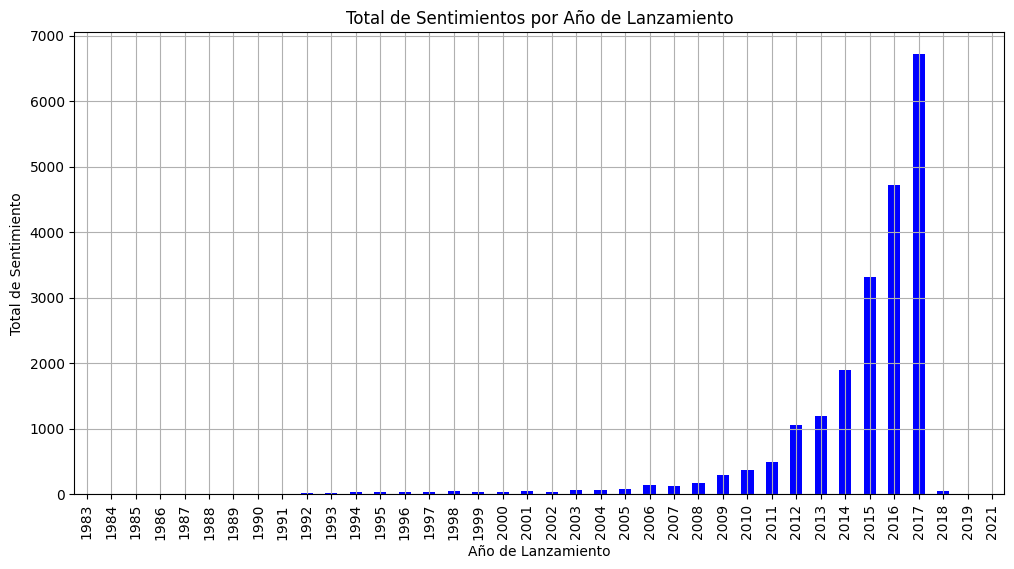

In [55]:


# Supongamos que tienes un DataFrame 'funcion_sentiment' con columnas 'release_date' y 'sentiment_analysis'

# Extraer el año de lanzamiento de la fecha
funcion_sentiment['Año de Lanzamiento'] = funcion_sentiment['release_date'].dt.year

# Contar el total de sentimientos por año
sentiment_by_year = funcion_sentiment.groupby('Año de Lanzamiento')['sentiment_analysis'].count()

# Crear un gráfico de barras
plt.figure(figsize=(12, 6))
sentiment_by_year.plot(kind='bar', color='b')
plt.title('Total de Sentimientos por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Total de Sentimiento')
plt.grid(True)
plt.show()


In [56]:

# Supongamos que tienes un DataFrame 'quinta_funcion' con las columnas 'release_date' y 'sentiment_analysis'

# Extraer el año de lanzamiento de la fecha
funcion_sentiment['Año de Lanzamiento'] = funcion_sentiment['release_date'].dt.year

# Calcular el total de sentimientos por año
sentiment_by_year = funcion_sentiment.groupby('Año de Lanzamiento')['sentiment_analysis'].count()

# Crear un DataFrame con los resultados
sentiment_by_year_df = pd.DataFrame({'Año de Lanzamiento': sentiment_by_year.index, 'Total de Sentimiento': sentiment_by_year.values})

# Mostrar el DataFrame
print(sentiment_by_year_df)


    Año de Lanzamiento  Total de Sentimiento
0                 1983                     1
1                 1984                     2
2                 1985                     1
3                 1986                     1
4                 1987                     4
5                 1988                     5
6                 1989                     7
7                 1990                     8
8                 1991                    10
9                 1992                    13
10                1993                    24
11                1994                    30
12                1995                    30
13                1996                    33
14                1997                    38
15                1998                    48
16                1999                    39
17                2000                    34
18                2001                    53
19                2002                    39
20                2003                    71
21        

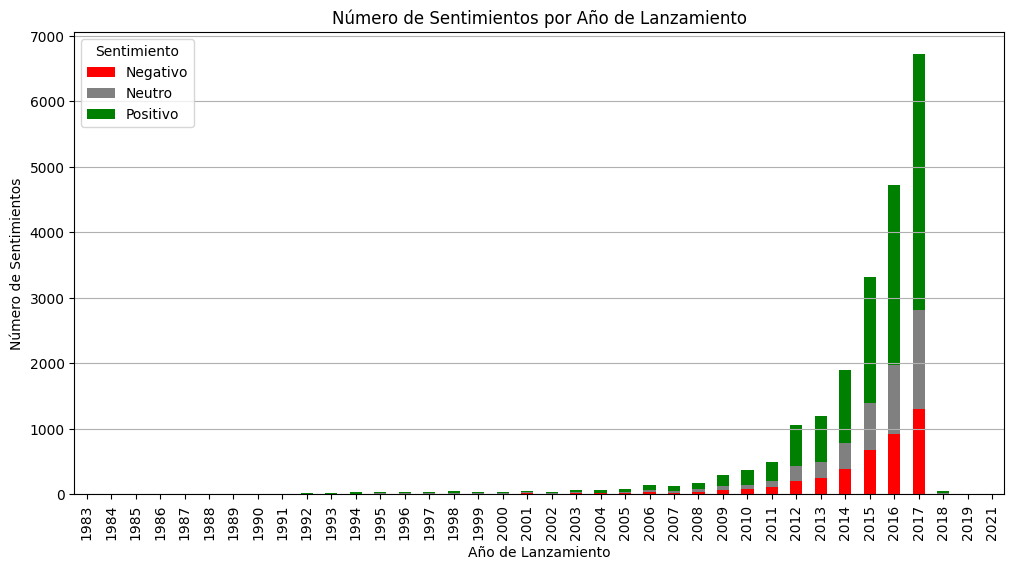

In [57]:


# Supongamos que tienes un DataFrame 'quinta_funcion' con las columnas 'release_date' y 'sentiment_analysis' (0, 1, 2)

# Extraer el año de lanzamiento de la fecha
funcion_sentiment['Año de Lanzamiento'] = funcion_sentiment['release_date'].dt.year

# Calcular el número de sentimientos por año y categoría (negativos, neutros, positivos)
sentiments_by_year = funcion_sentiment.groupby(['Año de Lanzamiento', 'sentiment_analysis']).size().unstack(fill_value=0)

# Crear un gráfico de barras apiladas
plt.figure(figsize=(12, 6))
sentiments_by_year.plot(kind='bar', stacked=True, color=['red', 'gray', 'green'], ax=plt.gca())
plt.title('Número de Sentimientos por Año de Lanzamiento')
plt.xlabel('Año de Lanzamiento')
plt.ylabel('Número de Sentimientos')
plt.grid(axis='y')
plt.legend(title='Sentimiento', labels=['Negativo', 'Neutro', 'Positivo'])
plt.show()


In [58]:




# Extraer el año de lanzamiento de la fecha
funcion_sentiment['Año de Lanzamiento'] = funcion_sentiment['release_date'].dt.year

# Calcular el número total de sentimientos por año y categoría (negativos, neutros, positivos)
sentiments_by_year = funcion_sentiment.groupby(['Año de Lanzamiento', 'sentiment_analysis']).size().unstack(fill_value=0)

# Cambiar los nombres de las columnas
sentiments_by_year.columns = ['Negativos', 'Neutros', 'Positivos']

# Restablecer el índice
sentiments_by_year.reset_index(inplace=True)

# Cambiar el nombre de la columna de índice
sentiments_by_year.columns.name = None

# Mostrar el DataFrame
sentiments_by_year


,Año de Lanzamiento,Negativos,Neutros,Positivos
0,1983,0,1,0
1,1984,0,0,2
2,1985,0,0,1
3,1986,0,1,0
4,1987,1,1,2
5,1988,0,1,4
6,1989,2,1,4
7,1990,0,2,6
8,1991,1,3,6
9,1992,4,2,7


In [59]:




def sentiment_analysis(año, dataframe):
    # Filtrar el DataFrame por el año de lanzamiento
    filtrado_por_año = dataframe[dataframe['release_date'].dt.year == año]

    # Calcular el número de registros para cada categoría de análisis de sentimiento
    resultados = filtrado_por_año['sentiment_analysis'].value_counts().to_dict()

    # Crear un diccionario con los resultados
    resultado = {
        'Negative': resultados.get(0, 0),
        'Neutral': resultados.get(1, 0),
        'Positive': resultados.get(2, 0)
    }

    # Mostrar los resultados en forma vertical
    for key, value in resultado.items():
        print(f'{key}: {value}')

año_de_interés = 2012
sentiment_analysis(año_de_interés, funcion_sentiment)


Negative: 204
Neutral: 221
Positive: 625


In [60]:
df_sentiment = funcion_sentiment[['sentiment_analysis','release_date','item_id','user_id']]

df_sentiment.to_parquet('data_sentiment.parquet', index=False)

df_sentiment

,sentiment_analysis,release_date,item_id,user_id
0,2.0,2018-01-04,43110.0,76561197970982479
1,0.0,2017-12-07,239030.0,js41637
2,2.0,2018-01-04,224500.0,evcentric
3,2.0,2018-01-04,108710.0,Riot-Punch
4,2.0,2018-01-04,204300.0,doctr
...,...,...,...,...
21189,0.0,2018-01-04,8930.0,76561198060027840
21190,2.0,2018-01-04,440.0,7Shadows
21191,2.0,2018-01-04,468410.0,76561198077307220
21192,0.0,2018-01-04,4000.0,amr_


### EDA Modelo Machine Learning def recomendacion_juego

In [84]:
# Cocateno los campos para el modelo

df_games_subset = df_games[['genres', 'title']]
df_items_subset = df_items[['item_id']]
 
df_juego = pd.concat([df_games_subset, df_items_subset ], axis=1)

df_juego.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88176 entries, 0 to 88175
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   genres   21194 non-null  object
 1   title    21194 non-null  object
 2   item_id  88176 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [85]:
# Elimino datos faltantes 
df_juego.dropna(inplace=True)
df_juego.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21194 entries, 0 to 21193
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   genres   21194 non-null  object
 1   title    21194 non-null  object
 2   item_id  21194 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 662.3+ KB


In [86]:
# Reorganizo los indices
df_juego.reset_index(drop=True, inplace=True)
print(df_juego.index)

RangeIndex(start=0, stop=21194, step=1)


In [95]:
df_juego.head()

,genres,title,item_id
0,"[Action, Casual, Indie, Simulation, Strategy]",Lost Summoner Kitty,10
1,"[Action, Adventure, Casual]",弹炸人2222,20
2,"[Action, Adventure, Simulation]",Battle Royale Trainer,30
3,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Pro Pass,40
4,"[Free to Play, Indie, Simulation, Sports]",SNOW - All Access Legend Pass,50


In [90]:


def recommend_games_by_genre(item_id, df):
    # Paso 1: Crear una matriz TF-IDF de los géneros de los juegos
    tfidf_vectorizer = TfidfVectorizer(stop_words='english')
    tfidf_matrix = tfidf_vectorizer.fit_transform(df['genres'].apply(lambda x: ' '.join(x)))

    # Paso 2: Calcular la similitud de coseno entre los juegos
    cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

    # Paso 3: Encontrar el índice del juego en función de su item_id
    idx = df[df['item_id'] == item_id].index[0]

    # Paso 4: Calcular la puntuación de similitud de coseno para todos los juegos con el juego dado
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Paso 5: Ordenar los juegos según su puntuación de similitud
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Paso 6: Obtener los índices de los juegos más similares (excluyendo el juego dado)
    sim_scores = sim_scores[1:6]

    # Paso 7: Obtener los títulos de los juegos recomendados
    game_indices = [i[0] for i in sim_scores]
    recommended_games = df['title'].iloc[game_indices]

    return recommended_games

# Ejemplo de uso
item_id = 43110.0  # Item ID del juego para el que deseas obtener recomendaciones
recommended_games = recommend_games_by_genre(item_id, df_juego)
print(recommended_games)


38                                 FlatOut 2™
39                                    FlatOut
73                            Midnight Club 2
82     18 Wheels of Steel: American Long Haul
113         Midnight Outlaw: 6 Hours to SunUp
Name: title, dtype: object


In [96]:
df_juego = df_juego[['genres','item_id','title']]

df_juego.to_parquet('data_juego.parquet', index=False)

df_juego

,genres,item_id,title
0,"[Action, Casual, Indie, Simulation, Strategy]",10,Lost Summoner Kitty
1,"[Action, Adventure, Casual]",20,弹炸人2222
2,"[Action, Adventure, Simulation]",30,Battle Royale Trainer
3,"[Free to Play, Indie, Simulation, Sports]",40,SNOW - All Access Pro Pass
4,"[Free to Play, Indie, Simulation, Sports]",50,SNOW - All Access Legend Pass
...,...,...,...
21189,"[Action, Adventure, Casual, Indie]",355150,Kebab it Up!
21190,"[Casual, Indie, Simulation, Strategy]",355180,Colony On Mars
21191,"[Casual, Indie, Strategy]",355520,LOGistICAL: South Africa
21192,"[Indie, Racing, Simulation]",355950,Russian Roads


In [101]:
import pandas as pd

# Cargar el DataFrame df_juegos desde tu fuente de datos actual

# Seleccionar las primeras 5000 filas
df_juego_subconjunto = df_juego.head(5000)

# Guardar el subconjunto en un nuevo archivo Parquet
df_juego_subconjunto.to_parquet("data_juegos.parquet", index=False)
